<a href="https://colab.research.google.com/github/yamphurai/Data_Mining_Project1/blob/main/DataMining_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing necessary libraries
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")
library(dplyr)
library(tidyr)

install.packages("dplyr")

# Load the dplyr package
library(dplyr)

── Attaching core tidyverse packages ────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



The downloaded binary packages are in
	/var/folders/1d/53kd6zpn72jbr2x8b7thj7t00000gn/T//Rtmp6FtOlg/downloaded_packages


# COVID-19 Global Mobility

In [6]:
# Retrieve "COVID-19_global_mobility.csv" file
dataset_global_mobility <- read.csv("https://www.dropbox.com/scl/fi/x4i3ah1gmt4kryrrq0c8m/Global_Mobility_Report.csv?rlkey=tt4i5q1zss7e8ly2zmn8xvhc2&st=xnxrxz2d&dl=1")

In [ ]:
names(dataset_global_mobility)

Here are the variables of the dataset

## Structure of the dataset

In [8]:
str(dataset_global_mobility)

'data.frame':	3991405 obs. of  14 variables:
 $ country_region_code                               : chr  "AE" "AE" "AE" "AE" ...
 $ country_region                                    : chr  "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" ...
 $ sub_region_1                                      : chr  "" "" "" "" ...
 $ sub_region_2                                      : chr  "" "" "" "" ...
 $ metro_area                                        : chr  "" "" "" "" ...
 $ iso_3166_2_code                                   : chr  "" "" "" "" ...
 $ census_fips_code                                  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date                                              : chr  "2020-02-15" "2020-02-16" "2020-02-17" "2020-02-18" ...
 $ retail_and_recreation_percent_change_from_baseline: int  0 1 -1 -2 -2 -2 -3 -2 -1 -3 ...
 $ grocery_and_pharmacy_percent_change_from_baseline : int  4 4 1 1 0 1 2 2 3 0 ...
 $ parks_percent_change_f

In [10]:
# Summary of the columns containing "int" data type
summary(dataset_global_mobility[, c("census_fips_code",
                                      "retail_and_recreation_percent_change_from_baseline",
                                      "grocery_and_pharmacy_percent_change_from_baseline",
                                      "parks_percent_change_from_baseline",
                                      "transit_stations_percent_change_from_baseline",
                                      "workplaces_percent_change_from_baseline",
                                      "residential_percent_change_from_baseline")])

 census_fips_code  retail_and_recreation_percent_change_from_baseline
 Min.   : 1001     Min.   :-100.0                                    
 1st Qu.:18105     1st Qu.: -41.0                                    
 Median :29115     Median : -19.0                                    
 Mean   :30356     Mean   : -23.2                                    
 3rd Qu.:45051     3rd Qu.:  -4.0                                    
 Max.   :56045     Max.   : 545.0                                    
 NA's   :3139208   NA's   :1478424                                   
 grocery_and_pharmacy_percent_change_from_baseline
 Min.   :-100                                     
 1st Qu.: -14                                     
 Median :  -2                                     
 Mean   :  -3                                     
 3rd Qu.:   9                                     
 Max.   : 615                                     
 NA's   :1564666                                  
 parks_percent_change_from_basel

In [12]:
# Count of unique values in these columns
columns_to_check <- c("country_region_code", "country_region", "sub_region_1", "sub_region_2", "metro_area", "iso_3166_2_code", "census_fips_code")
unique_counts <- sapply(dataset_global_mobility[, columns_to_check], function(column) length(unique(column)))
print(unique_counts)

country_region_code      country_region        sub_region_1        sub_region_2 
                135                 135                1861                9916 
         metro_area     iso_3166_2_code    census_fips_code 
                 66                2225                2838 


These are the counts of unique values in the respective feature columns. For example, there are 135 countries in the dataset.

## Missing values

In [14]:
# Compute the percentage of NA values for each column
na_percentages_global_mobility <- sapply(dataset_global_mobility, function(column) {
  sum(is.na(column)) / nrow(dataset_global_mobility) * 100
})
print(na_percentages_global_mobility)

                               country_region_code 
                                        0.06373695 
                                    country_region 
                                        0.00000000 
                                      sub_region_1 
                                        0.00000000 
                                      sub_region_2 
                                        0.00000000 
                                        metro_area 
                                        0.00000000 
                                   iso_3166_2_code 
                                        0.00000000 
                                  census_fips_code 
                                       78.64919746 
                                              date 
                                        0.00000000 
retail_and_recreation_percent_change_from_baseline 
                                       37.04019011 
 grocery_and_pharmacy_percent_change_from_baseline 
            

These are the percentage of missing values for each variable.

### Update "date" column with date type values

In [17]:
# Convert the date column to Date type and extract year and month
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(date = as.Date(date, format = "%Y-%m-%d")) %>%
  mutate(year_month = format(date, "%Y-%m"))

Creating new variable "year_month" that contains year and month based on the date on "date" variable.

In [18]:
head(dataset_global_mobility)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,year_month
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AE,United Arab Emirates,,,,,NA,2020-02-15,0,4,5,0,2,1,2020-02
2,AE,United Arab Emirates,,,,,NA,2020-02-16,1,4,4,1,2,1,2020-02
3,AE,United Arab Emirates,,,,,NA,2020-02-17,-1,1,5,1,2,1,2020-02
4,AE,United Arab Emirates,,,,,NA,2020-02-18,-2,1,5,0,2,1,2020-02
5,AE,United Arab Emirates,,,,,NA,2020-02-19,-2,0,4,-1,2,1,2020-02
6,AE,United Arab Emirates,,,,,NA,2020-02-20,-2,1,6,1,1,1,2020-02


In [19]:
# Drop irrelevant columns
dataset_global_mobility <- dataset_global_mobility %>%
  select(-country_region_code, -metro_area, -sub_region_1, -sub_region_2, -date)

# Remaining feature columns
names(dataset_global_mobility)

[1] "country_region"                                    
 [2] "iso_3166_2_code"                                   
 [3] "census_fips_code"                                  
 [4] "retail_and_recreation_percent_change_from_baseline"
 [5] "grocery_and_pharmacy_percent_change_from_baseline" 
 [6] "parks_percent_change_from_baseline"                
 [7] "transit_stations_percent_change_from_baseline"     
 [8] "workplaces_percent_change_from_baseline"           
 [9] "residential_percent_change_from_baseline"          
[10] "year_month"

We are interested more in larger geographic regions so our focus is limited to country and US states. Thus, all other variables related to geographies are dropped from the dataset.

In [20]:
# Checking for missing values in the dataset
na_counts <- colSums(is.na(dataset_global_mobility))

na_summary <- data.frame(
  Column = names((na_counts / 3991405) * 100),
  Missing_Values = round(((na_counts / 3991405) * 100),2),
  stringsAsFactors = FALSE
)

print(na_summary)

                                                                                               Column
country_region                                                                         country_region
iso_3166_2_code                                                                       iso_3166_2_code
census_fips_code                                                                     census_fips_code
retail_and_recreation_percent_change_from_baseline retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline   grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline                                 parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline           transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline                       workplaces_percent_change_from_baseline
residential_percent_change_from_baseline                     residential_percent_c

In [22]:
# Statistics of the remaining feature columns
summary(dataset_global_mobility %>% select(retail_and_recreation_percent_change_from_baseline,
                                            grocery_and_pharmacy_percent_change_from_baseline,
                                            parks_percent_change_from_baseline,
                                            transit_stations_percent_change_from_baseline,
                                            workplaces_percent_change_from_baseline,
                                            residential_percent_change_from_baseline))


 retail_and_recreation_percent_change_from_baseline
 Min.   :-100.0                                    
 1st Qu.: -41.0                                    
 Median : -19.0                                    
 Mean   : -23.2                                    
 3rd Qu.:  -4.0                                    
 Max.   : 545.0                                    
 NA's   :1478424                                   
 grocery_and_pharmacy_percent_change_from_baseline
 Min.   :-100                                     
 1st Qu.: -14                                     
 Median :  -2                                     
 Mean   :  -3                                     
 3rd Qu.:   9                                     
 Max.   : 615                                     
 NA's   :1564666                                  
 parks_percent_change_from_baseline
 Min.   :-100.0                    
 1st Qu.: -44.0                    
 Median : -17.0                    
 Mean   :  -9.5                 

Here is a quick basic statistics on the variables of the updated dataset.

## Feature processing "grocery_and_pharmacy_percent_change_from_baseline"

In [24]:
# Replace missing values in retail_and_recreation_percent_change_from_baseline with the corresponding average value for the corresponding
# region within the "iso_3166_2_code" feature column only if the average value is available
dataset_global_mobility <- dataset_global_mobility %>%

    #group the dataset by this column
    group_by(iso_3166_2_code) %>%

    #create updated version of the feature column
    mutate(retail_and_recreation_percent_change_from_baseline =

           # if there is missing value, replace it with mean of that group only if it's available
           ifelse(is.na(retail_and_recreation_percent_change_from_baseline),
                  {
                    avg_value <- mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE)
                    if (!is.na(avg_value)) avg_value   #if there is average value
                    else NA
                  },
                  retail_and_recreation_percent_change_from_baseline)) %>%

    # Ungroup after mutation
    ungroup()


In [26]:
dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(retail_and_recreation_percent_change_from_baseline))

# Checking for missing values
sum(is.na(dataset_global_mobility$retail_and_recreation_percent_change_from_baseline))

[1] 0

## Feature processing "grocery_and_pharmacy_percent_change_from_baseline"

In [28]:
# Replace missing values in "grocery_and_pharmacy_percent_change_from_baseline" with the corresponding average value for the corresponding
# region within the "iso_3166_2_code" feature column only if the average value is available
dataset_global_mobility <- dataset_global_mobility %>%

    #group the dataset by this column
    group_by(iso_3166_2_code) %>%

    #create updated version of the feature column
    mutate(grocery_and_pharmacy_percent_change_from_baseline =

           # if there is missing value, replace it with mean of that group only if it's available
           ifelse(is.na(grocery_and_pharmacy_percent_change_from_baseline),
                  {
                    avg_value <- mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE)
                    if (!is.na(avg_value)) avg_value   #if there is average value
                    else NA
                  },
                  grocery_and_pharmacy_percent_change_from_baseline)) %>%

    # Ungroup after mutation
    ungroup()

In [30]:
dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(grocery_and_pharmacy_percent_change_from_baseline))

# Checking for missing values
sum(is.na(dataset_global_mobility$grocery_and_pharmacy_percent_change_from_baseline))

[1] 0

## Feature processing "parks_percent_change_from_baseline"

In [33]:
# Replace missing values in "parks_percent_change_from_baseline" with the corresponding average value for the corresponding
# region within the "iso_3166_2_code" feature column only if the average value is available
dataset_global_mobility <- dataset_global_mobility %>%

    #group the dataset by this column
    group_by(iso_3166_2_code) %>%

    #create updated version of the feature column
    mutate(parks_percent_change_from_baseline =

           # if there is missing value, replace it with mean of that group only if it's available
           ifelse(is.na(parks_percent_change_from_baseline),
                  {
                    avg_value <- mean(parks_percent_change_from_baseline, na.rm = TRUE)
                    if (!is.na(avg_value)) avg_value   #if there is average value
                    else NA
                  },
                  parks_percent_change_from_baseline)) %>%

    # Ungroup after mutation
    ungroup()

dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(parks_percent_change_from_baseline))

# Checking for missing values
sum(is.na(dataset_global_mobility$parks_percent_change_from_baseline))

[1] 0

## Feature processing "transit_stations_percent_change_from_baseline"

In [35]:
# Replace missing values in "transit_stations_percent_change_from_baseline" with the corresponding average value for the corresponding
# region within the "iso_3166_2_code" feature column only if the average value is available
dataset_global_mobility <- dataset_global_mobility %>%

    #group the dataset by this column
    group_by(iso_3166_2_code) %>%

    #create updated version of the feature column
    mutate(transit_stations_percent_change_from_baseline =

           # if there is missing value, replace it with mean of that group only if it's available
           ifelse(is.na(transit_stations_percent_change_from_baseline),
                  {
                    avg_value <- mean(transit_stations_percent_change_from_baseline, na.rm = TRUE)
                    if (!is.na(avg_value)) avg_value   #if there is average value
                    else NA
                  },
                  transit_stations_percent_change_from_baseline)) %>%

    # Ungroup after mutation
    ungroup()

dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(transit_stations_percent_change_from_baseline))

# Checking for missing values
sum(is.na(dataset_global_mobility$transit_stations_percent_change_from_baseline))

[1] 0

## Feature processing "residential_percent_change_from_baseline"

In [38]:
# Replace missing values in "residential_percent_change_from_baseline" with the corresponding average value for the corresponding
# region within the "iso_3166_2_code" feature column only if the average value is available
dataset_global_mobility <- dataset_global_mobility %>%

    #group the dataset by this column
    group_by(iso_3166_2_code) %>%

    #create updated version of the feature column
    mutate(residential_percent_change_from_baseline =

           # if there is missing value, replace it with mean of that group only if it's available
           ifelse(is.na(residential_percent_change_from_baseline),
                  {
                    avg_value <- mean(residential_percent_change_from_baseline, na.rm = TRUE)
                    if (!is.na(avg_value)) avg_value   #if there is average value
                    else NA
                  },
                  residential_percent_change_from_baseline)) %>%

    # Ungroup after mutation
    ungroup()

dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(residential_percent_change_from_baseline))

# Checking for missing values
sum(is.na(dataset_global_mobility$residential_percent_change_from_baseline))

[1] 0

## Feature processing "census_fips_code"

In [42]:
# Count NA values in "census_fips_code" for countries other than the United States
na_count_non_us <- dataset_global_mobility %>%
  filter(country_region != "United States") %>%
  summarise(NA_Count = sum(is.na(census_fips_code)))

# Calculate the percentage of NA values
na_percentage_non_us <- (na_count_non_us$NA_Count / 3991405) * 100

# Print the result
print(paste("Percentage of NA values in census_fips_code for countries other than the United States:", round(na_percentage_non_us, 2), "%"))

# Check: Count of NA values for United States in census_fips_code column
na_count_us <- dataset_global_mobility %>%
  filter(country_region == "United States") %>%
  summarise(NA_Count = sum(is.na(census_fips_code)))

print(paste("Count of NA values in census_fips_code for United States:", na_count_us$NA_count))

[1] "Percentage of NA values in census_fips_code for countries other than the United States: 70.47 %"


Warning message:
“Unknown or uninitialised column: `NA_count`.”


[1] "Count of NA values in census_fips_code for United States: "


In [44]:
# Identify the unique countries other than the United States
unique_countries <- dataset_global_mobility %>%
  filter(country_region != "United States") %>%
  distinct(country_region) %>%
  pull(country_region)

# Create a mapping of these countries to unique dummy numbers
country_dummy_mapping <- data.frame(
  country_region = unique_countries,
  dummy_fips_code = 1:length(unique_countries)
)

# Update the census_fips_code column with these dummy numbers for the corresponding countries
dataset_global_mobility <- dataset_global_mobility %>%
  left_join(country_dummy_mapping, by = "country_region") %>%
  mutate(census_fips_code = ifelse(country_region != "United States" & is.na(census_fips_code),
                                   dummy_fips_code, census_fips_code)) %>%
  select(-dummy_fips_code) # Remove the temporary dummy_fips_code column


There are no missing values in the census_fips_code feature column. Also we can see that the census fips code are only on the observations made on the USA.

In [46]:
# Print the mapping of countries to dummy values
print(country_dummy_mapping)

            country_region dummy_fips_code
1     United Arab Emirates               1
2              Afghanistan               2
3      Antigua and Barbuda               3
4                   Angola               4
5                Argentina               5
6                  Austria               6
7                Australia               7
8                    Aruba               8
9   Bosnia and Herzegovina               9
10                Barbados              10
11              Bangladesh              11
12                 Belgium              12
13            Burkina Faso              13
14                Bulgaria              14
15                 Bahrain              15
16                   Benin              16
17                 Bolivia              17
18                  Brazil              18
19             The Bahamas              19
20                Botswana              20
21                 Belarus              21
22                  Belize              22
23         

Here are the dummy codes assigned to the remaining 134 countries in the "census_fips_code" column.

In [49]:
# Check for missing values in census_fips_code for the United States
missing_fips_us <- dataset_global_mobility %>%
  filter(country_region == "United States" & is.na(census_fips_code))

# Count the number of missing values
count_missing_fips_us <- nrow(missing_fips_us)

print(paste("Missing census_fips_code values for the United States: ", ((count_missing_fips_us/3991405)*100)))


[1] "Missing census_fips_code values for the United States:  0.43826672562669"


Since there are only about 0.43% of missing values in the "census_fips_code" feature column for the United States, these missing can be completed removed from the dataset.

In [52]:
# Remove observations with missing values in "census_fips_code" column for the United States country
dataset_global_mobility <- dataset_global_mobility %>%
  filter(!is.na(census_fips_code))

In [54]:
sum(is.na(dataset_global_mobility$census_fips_code))

[1] 0

All the missing values in the column "census_fips_code" have been properly handled.

In [57]:
# Checking for missing values in the dataset after all the feature processing & summary of the updated dataset
sum(is.na(dataset_global_mobility))

[1] 0

In [ ]:
str(dataset_global_mobility)

About 8% of the observations were removed from the original dataset.

## Analysis on COVID-19 impact

### Change in visit to Retail & Recreation

In [ ]:
install.packages('IRkernel')
IRkernel::installspec()


In [ ]:
# Save the updated and cleaned dataset as a CSV file
write.csv(dataset_global_mobility, "dataset_global_mobility_cleaned.csv", row.names = FALSE)

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for retail and recreation for each country and year
aggregated_data_retail_recreation <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_retail_recreation = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to retail & recreation locations for each country across both years (2020 & 2021)
overall_mean_retail_recreation <- aggregated_data_retail_recreation %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_retail_recreation = mean(mean_percent_change_retail_recreation, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_retail_recreation))

# Select only the top 20 countries based on the overall mean percent change
top_countries_retail_recreation <- overall_mean_retail_recreation %>%
  top_n(20, wt = overall_mean_change_retail_recreation)

# Calculate the mean percent change for the United States
us_data <- aggregated_data_retail_recreation %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_retail_recreation <- aggregated_data_retail_recreation %>%
  filter(country_region %in% c(top_countries_retail_recreation$country_region, "United States"))

# Plot for top countries including the United States
plot_retail_recreation <- ggplot(top_aggregated_data_retail_recreation, aes(x = reorder(country_region, -mean_percent_change_retail_recreation), y = mean_percent_change_retail_recreation, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to retail & recreation in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_retail_recreation)

In [ ]:
# Save the plot to a file
ggsave("retail_recreation_plot.png", plot = plot_retail_recreation, width = 12, height = 8, dpi = 300)

### Change in visit to Grocery & Pharmacy

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for grocery and pharmacy for each country and year
aggregated_data_grocery_pharmacy <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_grocery_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to grocery & pharmacy locations for each country across both years (2020 & 2021)
overall_mean_grocery_pharmacy <- aggregated_data_grocery_pharmacy %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_grocery_pharmacy = mean(mean_percent_change_grocery_pharmacy, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_grocery_pharmacy))

# Select only the top 20 countries based on the overall mean percent change
top_countries_grocery_pharmacy <- overall_mean_grocery_pharmacy %>%
  top_n(20, wt = overall_mean_change_grocery_pharmacy)

# Calculate the mean percent change for the United States
usa_data_grocery_pharmacy <- aggregated_data_grocery_pharmacy %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_grocery_pharmacy <- aggregated_data_grocery_pharmacy %>%
  filter(country_region %in% c(top_countries_grocery_pharmacy$country_region, "United States"))

# Plot for top countries including the United States
plot_grocery_pharmacy <- ggplot(top_aggregated_data_grocery_pharmacy, aes(x = reorder(country_region, -mean_percent_change_grocery_pharmacy), y = mean_percent_change_grocery_pharmacy, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to grocery & pharmacy in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_grocery_pharmacy)

# Save the plot
ggsave("plot_grocery_pharmacy_with_usa.png", plot = plot_grocery_pharmacy, width = 10, height = 6)


### Change in visit to Parks

In [ ]:

# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for parks for each country and year
aggregated_data_parks <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_parks = mean(parks_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to parks locations for each country across both years (2020 & 2021)
overall_mean_parks <- aggregated_data_parks %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_parks = mean(mean_percent_change_parks, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_parks))

# Select only the top 20 countries based on the overall mean percent change
top_countries_parks <- overall_mean_parks %>%
  top_n(20, wt = overall_mean_change_parks)

# Calculate the mean percent change for the United States
us_data_parks <- aggregated_data_parks %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_parks <- aggregated_data_parks %>%
  filter(country_region %in% c(top_countries_parks$country_region, "United States"))

# Plot for top countries including the United States
plot_parks <- ggplot(top_aggregated_data_parks, aes(x = reorder(country_region, -mean_percent_change_parks), y = mean_percent_change_parks, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to parks in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_parks)

# Save the plot
ggsave("plot_parks_with_us.png", plot = plot_parks, width = 10, height = 6)

### Change in visit to Transit Stations

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for transit stations for each country and year
aggregated_data_transit_stations <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_transit_stations = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to transit stations for each country across both years (2020 & 2021)
overall_mean_transit_stations <- aggregated_data_transit_stations %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_transit_stations = mean(mean_percent_change_transit_stations, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_transit_stations))

# Select only the top 20 countries based on the overall mean percent change
top_countries_transit_stations <- overall_mean_transit_stations %>%
  top_n(20, wt = overall_mean_change_transit_stations)

# Calculate the mean percent change for the United States
us_data_transit_stations <- aggregated_data_transit_stations %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_transit_stations <- aggregated_data_transit_stations %>%
  filter(country_region %in% c(top_countries_transit_stations$country_region, "United States"))

# Plot for top countries including the United States
plot_transit_stations <- ggplot(top_aggregated_data_transit_stations, aes(x = reorder(country_region, -mean_percent_change_transit_stations), y = mean_percent_change_transit_stations, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to transit stations in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_transit_stations)

# Save the plot
ggsave("plot_transit_stations_with_us.png", plot = plot_transit_stations, width = 10, height = 6)

### Change in visit to Workplaces

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for workplaces for each country and year
aggregated_data_workplaces <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_workplaces = mean(workplaces_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to workplaces for each country across both years (2020 & 2021)
overall_mean_workplaces <- aggregated_data_workplaces %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_workplaces = mean(mean_percent_change_workplaces, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_workplaces))

# Select only the top 20 countries based on the overall mean percent change
top_countries_workplaces <- overall_mean_workplaces %>%
  top_n(20, wt = overall_mean_change_workplaces)

# Calculate the mean percent change for the United States
us_data_workplaces <- aggregated_data_workplaces %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_workplaces <- aggregated_data_workplaces %>%
  filter(country_region %in% c(top_countries_workplaces$country_region, "United States"))

# Plot for top countries including the United States
plot_workplaces <- ggplot(top_aggregated_data_workplaces, aes(x = reorder(country_region, -mean_percent_change_workplaces), y = mean_percent_change_workplaces, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to workplaces in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_workplaces)

# Save the plot
ggsave("plot_workplaces_with_us.png", plot = plot_workplaces, width = 10, height = 6)


### Change in visit to Residential

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021, extracting the year directly during summarization
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate the mean percent change for residential visits for each country and year
aggregated_data_residential <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(mean_percent_change_residential = mean(residential_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Calculate the overall mean percent change of visit to residential locations for each country across both years (2020 & 2021)
overall_mean_residential <- aggregated_data_residential %>%
  group_by(country_region) %>%
  summarise(overall_mean_change_residential = mean(mean_percent_change_residential, na.rm = TRUE)) %>%
  arrange(desc(overall_mean_change_residential))

# Select only the top 20 countries based on the overall mean percent change
top_countries_residential <- overall_mean_residential %>%
  top_n(20, wt = overall_mean_change_residential)

# Calculate the mean percent change for the United States
us_data_residential <- aggregated_data_residential %>%
  filter(country_region == "United States")

# Filter the data for top countries and add United States
top_aggregated_data_residential <- aggregated_data_residential %>%
  filter(country_region %in% c(top_countries_residential$country_region, "United States"))

# Plot for top countries including the United States
plot_residential <- ggplot(top_aggregated_data_residential, aes(x = reorder(country_region, -mean_percent_change_residential), y = mean_percent_change_residential, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries with highest % change in visit to residential locations in 2020 & 2021 compared to baseline",
       x = "Country",
       y = "Mean Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_residential)

# Save the plot
ggsave("plot_residential_with_us.png", plot = plot_residential, width = 10, height = 6)


### Change in visits between 2020 & 2021

In [ ]:
# Convert year_month to Date type (first day of the month to make it a proper date)
dataset_global_mobility <- dataset_global_mobility %>%
  mutate(year_month = as.Date(paste0(year_month, "-01")))

# Filter for the years 2020 and 2021
filtered_data <- dataset_global_mobility %>%
  filter(format(year_month, "%Y") %in% c("2020", "2021"))

# Calculate mean percent changes for visits to public locations
mean_changes <- filtered_data %>%
  group_by(country_region, year = format(year_month, "%Y")) %>%
  summarise(
    mean_retail_recreation = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
    mean_grocery_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
    mean_parks = mean(parks_percent_change_from_baseline, na.rm = TRUE),
    mean_transit_stations = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
    mean_workplaces = mean(workplaces_percent_change_from_baseline, na.rm = TRUE)
  ) %>%
  ungroup()

# Calculate overall mean percent change
overall_mean_changes <- mean_changes %>%
  rowwise() %>%
  mutate(overall_mean_change = mean(c(mean_retail_recreation, mean_grocery_pharmacy,
                                       mean_parks, mean_transit_stations,
                                       mean_workplaces), na.rm = TRUE)) %>%
  ungroup()

# Select only the top 20 countries based on the overall mean percent change
top_countries <- overall_mean_changes %>%
  group_by(country_region) %>%
  summarise(overall_mean = mean(overall_mean_change, na.rm = TRUE)) %>%
  top_n(20, wt = overall_mean) %>%
  pull(country_region)

# Filter the overall mean changes for top countries and include the United States
top_aggregated_mean_changes <- overall_mean_changes %>%
  filter(country_region %in% c(top_countries, "United States"))

# Plot for top countries including the United States
plot_overall_mean_changes <- ggplot(top_aggregated_mean_changes, aes(x = reorder(country_region, -overall_mean_change), y = overall_mean_change, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Top 20 countries (including USA) with highest change in visits to public locations between 2020 & 2021",
       x = "Country",
       y = "Average Percent Change from Baseline",
       fill = "Year") +
  scale_y_continuous(breaks = seq(-100, 100, by = 5)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_overall_mean_changes)

# Save the plot
ggsave("plot_overall_mean_changes.png", plot = plot_overall_mean_changes, width = 10, height = 6)

### Change in visits to public locations in different US states

In [100]:
# Filter for "United States" from "country_region" column
us_data <- dataset_global_mobility %>%
  filter(country_region == "United States")

# Extract first two digits from 'census_fips_code' to get state codes
us_data <- us_data %>%
  mutate(state_code = substr(census_fips_code, 1, 2))

# Compute mean percent changes for visits to public locations by state
state_avg_change <- us_data %>%
  group_by(state_code) %>%
  summarise(
    mean_retail_recreation = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
    mean_grocery_pharmacy = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
    mean_parks = mean(parks_percent_change_from_baseline, na.rm = TRUE),
    mean_transit_stations = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
    mean_workplaces = mean(workplaces_percent_change_from_baseline, na.rm = TRUE)
  ) %>%
  rowwise() %>%
  mutate(avg_percent_change_US_states = mean(c(mean_retail_recreation, mean_grocery_pharmacy,
                                     mean_parks, mean_transit_stations,
                                     mean_workplaces), na.rm = TRUE)) %>%
  ungroup()




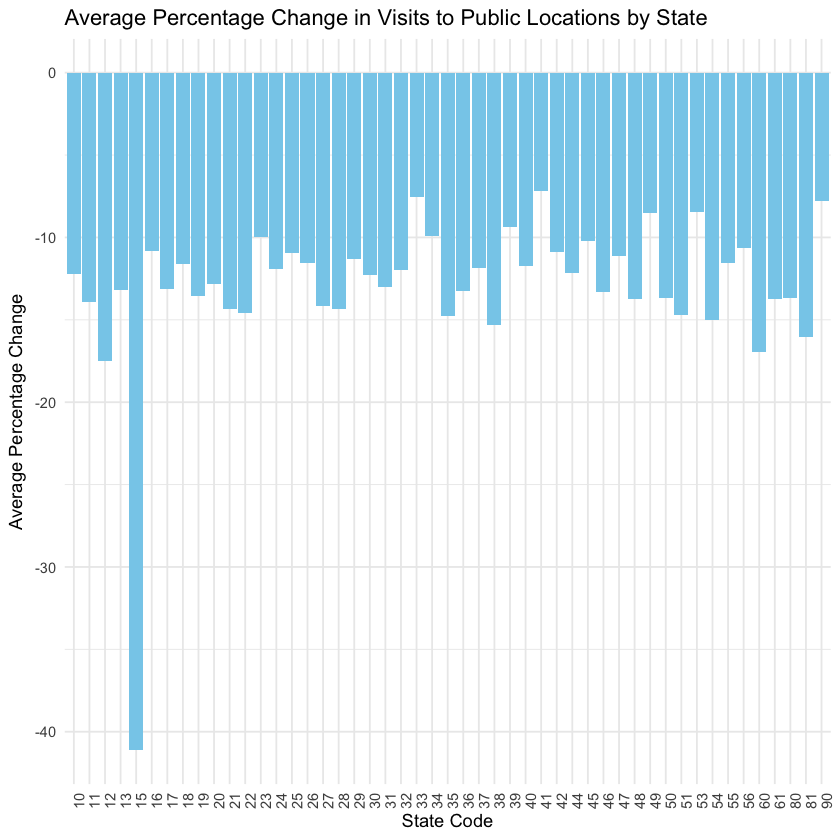

In [102]:
# Plot the average percentage change for each state
ggplot(state_avg_change, aes(x = state_code, y = avg_percent_change_US_states)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Percentage Change in Visits to Public Locations by State",
       x = "State Code",
       y = "Average Percentage Change") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

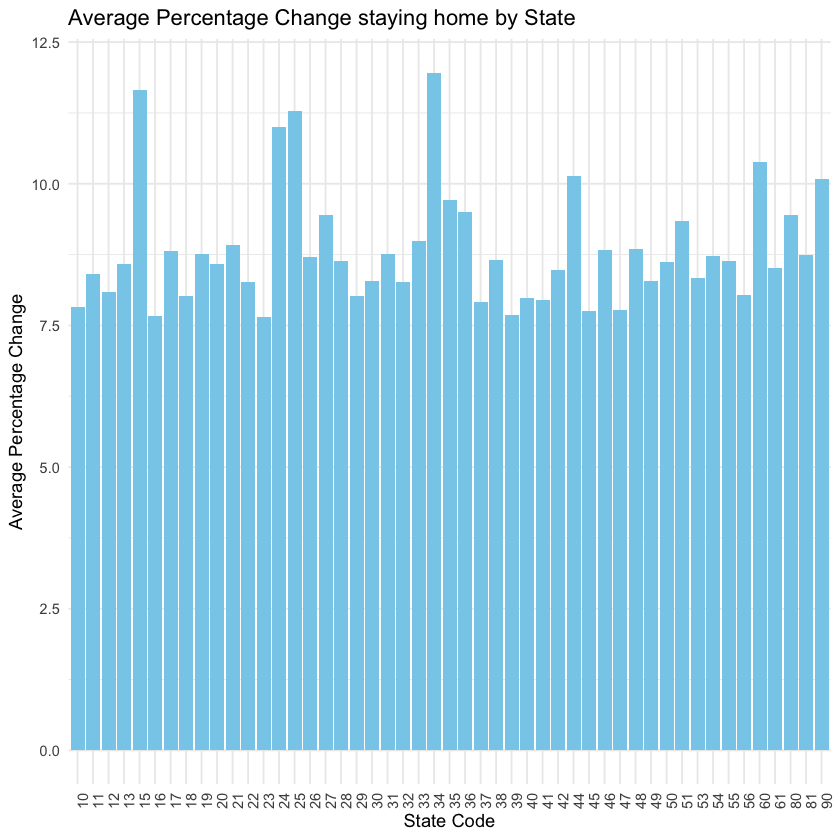

In [104]:
# Calculate the mean percent change for residential visits by state
state_avg_change_residential <- us_data %>%
  group_by(state_code) %>%
  summarise(mean_residential = mean(residential_percent_change_from_baseline, na.rm = TRUE)) %>%
  ungroup()

# Plot the average percentage change for each state for residential visits
ggplot(state_avg_change_residential, aes(x = state_code, y = mean_residential)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Percentage Change staying home by State",
       x = "State Code",
       y = "Average Percentage Change") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

Similary to what we see in the previous chart, we can still that there were comparatively more people stayed home in Hawaii (second to New Jersey with state code of 34). 

### Overview of state fips code

In [ ]:
# Create dataset with first column containing states fip codes and corresponding mean % change values in second column
select(state_code, avg_percent_change_US_states)
print(state_avg_change)

In [98]:
# Sort and filter FIPS codes larger than 134
filtered_fips_codes <- sort(unique(dataset_global_mobility$census_fips_code))
filtered_fips_codes <- filtered_fips_codes[filtered_fips_codes > 134]

# Extract the first two digits from each filtered FIPS code
first_two_digits <- substr(filtered_fips_codes, 1, 2)

# Print the result
print(sort(unique(first_two_digits)))

 [1] "10" "11" "12" "13" "15" "16" "17" "18" "19" "20" "21" "22" "23" "24" "25"
[16] "26" "27" "28" "29" "30" "31" "32" "33" "34" "35" "36" "37" "38" "39" "40"
[31] "41" "42" "44" "45" "46" "47" "48" "49" "50" "51" "53" "54" "55" "56" "60"
[46] "61" "80" "81" "90"


These fip codes represent various US states (missing many US states).